## Predict Heart Failure

### Load the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv(r'C:\Users\hp\Downloads\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Preprocessing

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Check for missing values

In [5]:
# Check for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Checking for outliers

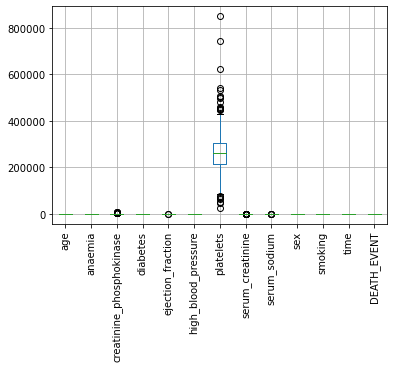

In [7]:
# Checking for outliers
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
## Handing outliers

# Columns having outliers
outlier_colms = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
df1 = df.copy()

def handle_outliers(df, colm):
    '''Change the values of outlier to upper and lower whisker values '''
    q1 = df.describe()[colm].loc["25%"]
    q3 = df.describe()[colm].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(len(df)):
        if df.loc[i,colm] > upper_bound:
            df.loc[i,colm]= upper_bound
        if df.loc[i,colm] < lower_bound:
            df.loc[i,colm]= lower_bound
    return df
    
for colm in outlier_colms:
    df1 = handle_outliers(df1, colm)

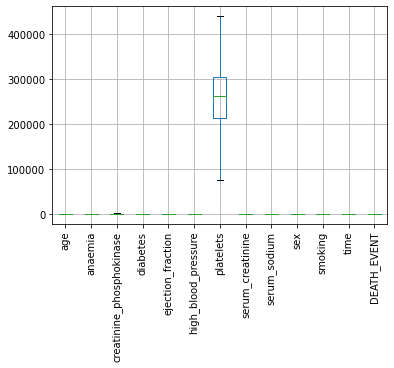

In [10]:
# Again check for outliers
df1.boxplot()
plt.xticks(rotation=90);

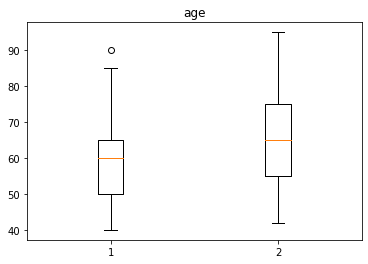

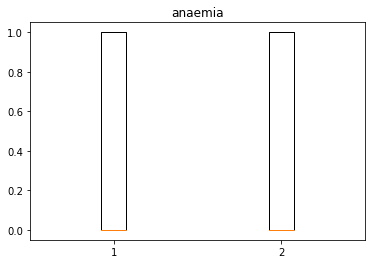

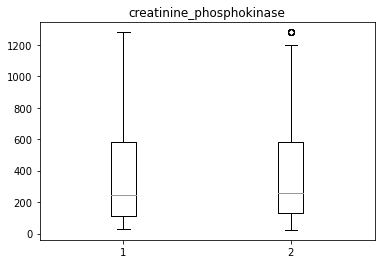

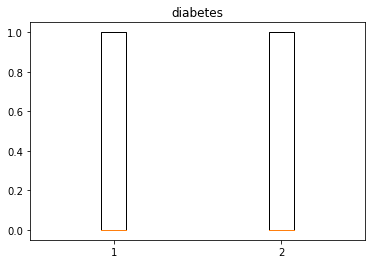

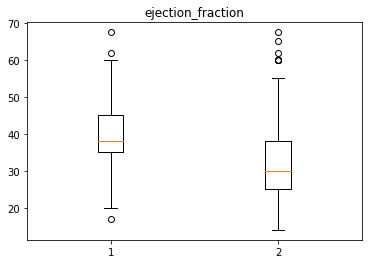

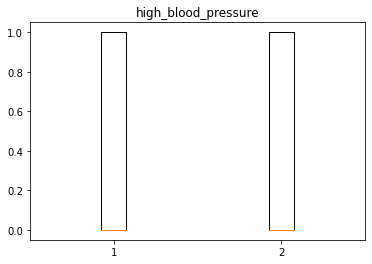

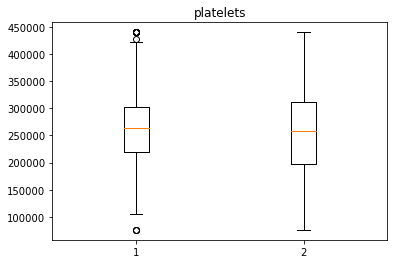

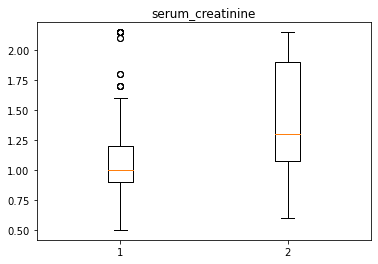

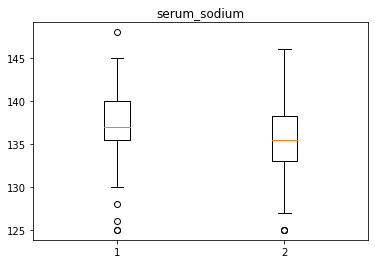

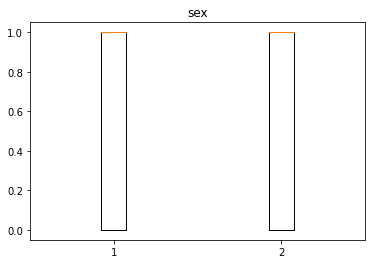

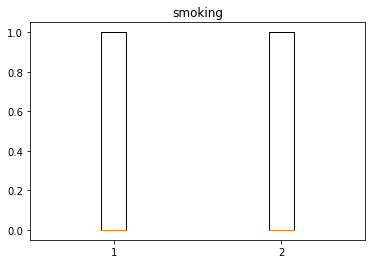

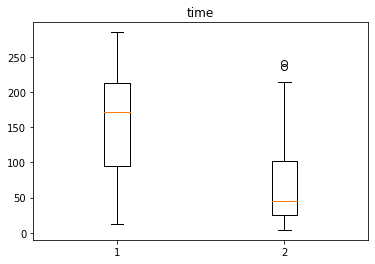

In [11]:
# Feature selection
col = df1.columns
for i in range(12):
    plt.boxplot([df1[df1['DEATH_EVENT']==0].iloc[:,i], df1[df1['DEATH_EVENT']==1].iloc[:,i]])
    plt.title(col[i])
    plt.show()

In [12]:
pd.crosstab(df['smoking'], df['DEATH_EVENT'])

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


### Features and Labels

In [13]:
# Prediction features
X = df1.iloc[:, :-1].values

# Target feature
y = df1['DEATH_EVENT'].values

X.shape, y.shape

((299, 12), (299,))

### Split data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state= 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 12), (90, 12), (209,), (90,))

### Build and Train Decision Tree Classifier

In [15]:
# Instantiate Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4, random_state= 123)

# Fit on train test
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

In [16]:
# Model prediction
y_pred = dt.predict(X_test)

# Accuracy score
print("Training score: ", dt.score(X_train, y_train))
print("Testing score: ", dt.score(X_test, y_test))

Training score:  0.9090909090909091
Testing score:  0.8777777777777778


### Perform Cross Validation for DecisionTreeClassifier

In [20]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation
cv = cross_val_score(dt, X, y, cv=10)
print(cv)
print("Mean accuracy score: ", cv.mean())

[0.33333333 0.73333333 0.8        0.93333333 0.86666667 0.7
 0.53333333 0.76666667 0.66666667 0.68965517]
Mean accuracy score:  0.7022988505747125


### Hyperparameter tuning for DecisionTreeClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Instantiate DTClassifier
DT = DecisionTreeClassifier(random_state= 123)

# Create parameter grid
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}

In [22]:
# Instantiate GridSearchCV object
cgcv = GridSearchCV(DT,param_grid, cv= 6, scoring= 'accuracy', n_jobs= -1)
# Fit on training set
cgcv.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [23]:
# Outcomes
print("Best params: ", cgcv.best_params_)
print("Best score: ", cgcv.best_score_)

Best params:  {'max_depth': 1}
Best score:  0.8086834733893556


### Ensemble Methods - Voting Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Instantiate DT, Log_reg, KNN classifiers
d_t = DecisionTreeClassifier(random_state= 123)
logreg = LogisticRegression(random_state= 123)
knn = KNN()

classifiers = [('knn', knn), ('logreg', logreg), ('ClassTree', d_t)]

In [27]:
# Voting Classifier
vc = VotingClassifier(estimators= classifiers)
# Fit on training set
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('logreg', LogisticRegression(random_state=123)),
                             ('ClassTree',
                              DecisionTreeClassifier(random_state=123))])

In [28]:
y_pred = vc.predict(X_test)
print("Training score: ", accuracy_score(vc.predict(X_train), y_train))
print("Testing score: ", accuracy_score(y_test, y_pred))

Training score:  0.9330143540669856
Testing score:  0.8666666666666667


### Ensemble Methods - Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Random Forest classifier
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=123)
# Fit on training set
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.12, n_estimators=400,
                       random_state=123)

In [31]:
print("Training score: ", accuracy_score(y_train, rf.predict(X_train)))
print("Testing score: ", accuracy_score(y_test, rf.predict(X_test)))

Training score:  0.7894736842105263
Testing score:  0.8111111111111111


#### Feature Importances

age 0.10672312490065584
anaemia 0.014959342431777857
creatinine_phosphokinase 0.029205562437737215
diabetes 0.0063035904469629835
ejection_fraction 0.22018193256866903
high_blood_pressure 0.023514353984878257
platelets 0.045356449722888
serum_creatinine 0.12068330953492966
serum_sodium 0.08492835625806959
sex 0.009973431406031456
smoking 0.006939822173707028
time 0.3312307241336932


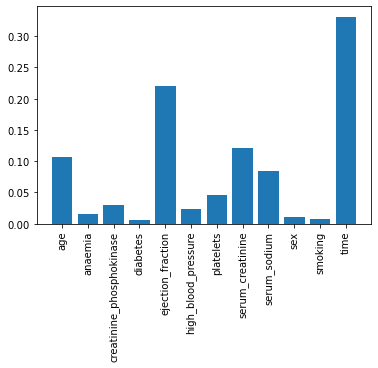

In [32]:
# Visualize Feature importance plot
for name, score in zip(df1.columns[:-1], rf.feature_importances_):
    print(name, score)
    
plt.bar(df1.columns[:-1], rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

#### Selecting the feature with high importance:

In [33]:
# Prediction features
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']].values
# Target feature
y = df1['DEATH_EVENT'].values

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state= 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 5), (90, 5), (209,), (90,))

In [35]:
# Use Random Forest Classifier
rf_ = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=123)
rf_.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.12, n_estimators=400,
                       random_state=123)

In [36]:
print("Training score: ", accuracy_score(y_train, rf_.predict(X_train)))
print("Testing score: ", accuracy_score(y_test, rf_.predict(X_test)))

Training score:  0.84688995215311
Testing score:  0.8888888888888888


From the above results, we can see that after considering only the features with high importance the accuracy score has been increased.